# **Аналитический кейс. Приоритизация гипотез и анализ результатов A/B-теста для интернет-магазина**

## **Описание проекта**

Проект выполняется по заказу крупного интернет-магазина. На основе подготовленного отделом маркетинга и аналитиками списка гипотез для увеличения выручки необходимо провести анализ, который позволит приоритизировать гипотезы. На следующем этапе необходимо запустить A/B-тест и проанализировать его результаты. 

## **Загрузка библиотек и данных**

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
from scipy import stats as st
import math as mth

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
sns.set()

In [6]:
hypothesis = pd.read_csv('C:/Rabota/IT/Datasets/hypothesis.csv')

In [7]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [8]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [9]:
orders = pd.read_csv('C:/Rabota/IT/Datasets/orders.csv', parse_dates=['date'])

In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
visitors = pd.read_csv('C:/Rabota/IT/Datasets/visitors.csv')

In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


## **Часть 1. Приоритизация гипотез**

В файле /datasets/hypothesis.csv содержится 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Задача:

+ применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
+ применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
+ указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

In [13]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез.

In [14]:
hypothesis['ice'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [15]:
(
  hypothesis[['Hypothesis', 'ice']]
 .sort_values(by='ice', ascending=False)
 .style.format('{:.2f}', subset=['ice'])
)
# .style.set_properties(subset=['Hypothesis'], **{'width': '500px'})

,Hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Индекс ICE ставит на первое место с точки приоритетности вариант с запуском акции, дающей скидку на товар в день рождения (16,2 балла). На втором месте идут новые каналы привлечения трафика (13,3 балла) и на третьем - форма подписки на основные страницы (11,2 балла). Остальные гипотезы получила в рамках фреймворка ICE менее 10 баллов.

Применим фреймворк RICE для приоритизации гипотез.

In [16]:
hypothesis['rice'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [17]:
(
  hypothesis[['Hypothesis', 'rice', 'ice']]
 .sort_values(by='rice', ascending=False)
 .style.background_gradient(cmap='Greens', axis=0, low=0.1, high=1)
    .format('{:.2f}', subset=['rice', 'ice']).set_properties(subset=['rice', 'ice'], **{'width': '100px'})
)

,Hypothesis,rice,ice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00,11.20
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00,7.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00,13.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00,8.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00,1.12
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00,1.33
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00,1.00


Визуализируем показатели ICE и RICE напротив друг друга

In [18]:
hypothesis['hypo_short'] = ['Новые каналы трафика', 'Служба доставки',
       'Блоки рекомендаций', 'Новая структура категорий',
       'Цвет фона главной страницы', 'Страница отзывов',
       'Баннеры с акциями', 'Форма подписки',
       'Скидка в день рождения']

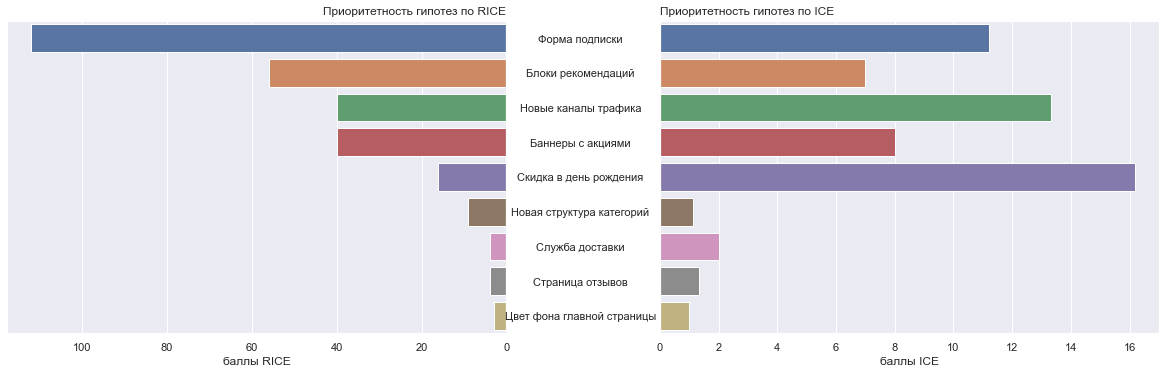

In [19]:
hypothesis = hypothesis.sort_values(by='rice', ascending=False)
fig, ax = plt.subplots(1,2,figsize=(16,5))
labels=hypothesis.hypo_short
sns.barplot(x=hypothesis.rice, y=hypothesis.hypo_short, ax=ax[0])
sns.barplot(x=hypothesis.ice, y=hypothesis.hypo_short, ax=ax[1])

ax[0].invert_xaxis() 
ax[0].tick_params(labelleft=False, left=False)
ax[1].set_yticklabels(labels, ha='center', position=(-0.14,0))

ax[0].set_xlabel("баллы RICE")
ax[1].set_xlabel("баллы ICE")
ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[0].set_title("Приоритетность гипотез по RICE", loc='right')
ax[1].set_title("Приоритетность гипотез по ICE", loc='left')

plt.tight_layout(w_pad=0.7, pad=0)
plt.show();

Индекс RICE по-другому распределил наши гипотезы по приоритетности, нежели ICE. На первое место вышла форма подписки на основные страницы (112 баллов по фреймворку RICE - ровно в два раза больше, чем вторая по приоритетности гипотеза). На втором месте - блоки рекомендаций товаров (56 баллов) и, наконец, на третьем месте - новые каналы привлечения трафика. 

Мы видим, что запуск скидочной акции на товары в день рождения, который лидеровал по результатам подсчета ICE, не вошел в тройку лидеров по версии RICE, что связано с тем, что данный вариант имеет очень низкий охват аудитории (всего 1 балл), т.е. вовлеченность пользователей здесь будет низкая, в то время как у формы подписки показатель Reach составляет 10 баллов (т.е. это предложение охватывает потенциально практически всех пользователей сайта), что позволяет этой гипотезе выйти в лидеры по версиии RICE.    

## **Выводы и рекомендации**

Приоритет следует отдать гипотезам, которые оказались в тройке обоих фреймворков: это форма подписки на основных страницах и два новых канала трафика для привлечения пользователей. Именно эти гипотезы и следует запустить в работу. При возможности протестировать можно обе. Если же необходимо отдать приоритет только одной из них, целесообразно остановиться на гипотезе, занявшей первое место в рейтинге приоритетности - это добавление формы подписки на основные страницы.  

# **Часть 2. Анализ A/B-теста**

Мы провели A/B-тест и получили результаты, которые описаны в файлах datasets/orders.csv и /datasets/visitors.csv.
Задача - проанализировать A/B-тест.

## **2.1. Предобработка данных**

In [20]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [22]:
orders.duplicated().sum()

0

В таблице orders 5 столбцов и 1197 строк. Пропусков в данных нет. Дубликаты также отсутствуют. Столбец date содержит даты в формате object, который необходимо поменять на datetime.

In [23]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

Проверим данные в столбцах transactionId, visitorId, revenue и date на наличие аномальных (например, отрицательных) значений. Для этого посмотрим минимальные и максимальные значения.

In [24]:
orders[['transactionId', 'visitorId', 'revenue', 'date']].apply(['min', 'max'])

,transactionId,visitorId,revenue,date
min,1062393,5114589,50,2019-08-01
max,4293855558,4283872382,1294500,2019-08-31


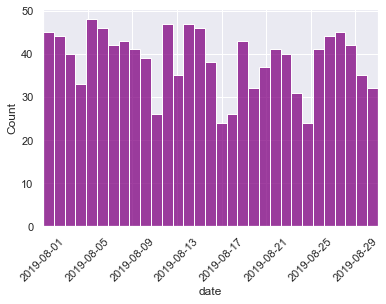

In [25]:
sns.histplot(orders.date, bins=31, color='Purple')
plt.xlim(dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31))
plt.xticks(rotation=45);

Отрицательных или нулевых значений в столбцах нет. Данные собраны за все дни в период с 1 по 31 августа 2019 года.

Проверим, чтобы у нас не было лишних значений, помимо названий групп A и В, в столбце group

In [26]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Проверим, нет ли у нас пользователей, попавших сразу в две группы

In [27]:
(
    orders.groupby('visitorId')['group']
    .agg('nunique').sort_values(ascending=False)
)

visitorId
2654030115    2
3891541246    2
3941795274    2
1404934699    2
351125977     2
             ..
1476256851    1
1476741193    1
1484903144    1
1485964287    1
4283872382    1
Name: group, Length: 1031, dtype: int64

In [28]:
dubles = (
    orders.groupby('visitorId')['group']
    .agg('nunique').sort_values(ascending=False)
    .to_frame('group_cnt').query('group_cnt > 1').index
)
len(dubles)

58

58 покупателей попали в обе группы, что может повлиять на результаты теста. В обеих группах должны быть уникальные пользователи, поэтому исключим "дублеров" из дальнейшего исследования. 

In [29]:
orders = orders[~orders['visitorId'].isin(dubles)]

Проведем предварительный анализ данных по датасету visitors

In [30]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [31]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [32]:
visitors.duplicated().sum()

0

In [33]:
visitors['visitors'].apply(['min', 'max'])

min    361
max    770
Name: visitors, dtype: int64

In [34]:
visitors.group.value_counts()

A    31
B    31
Name: group, dtype: int64

В таблице visitors у нас 3 столбца и 62 строки. Пропуски и дубликаты отсутствуют. Аномальных значений в столбце с количеством посетителей (visitors) не просматривается. Данные равномерно распределены по группам А и В (по одной записи для каждого дня с 01.08.2019 по 31.08.2019). Формат даты в столбце date необходимо поменять на datetime.

In [35]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

## **2.2. Анализ результатов А/В теста**

### **2.2.1. Построим график кумулятивной выручки по группам**

In [36]:
# Сгруппируем данные по датам и распределим показатели в группах А и В по разным столбцам
orders_grouped = (
  orders.pivot_table(index='date', columns='group', \
                     values=['transactionId', 'visitorId', 'revenue'], \
                     aggfunc={'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'})
  .reset_index()
)
orders_grouped.columns = ['date', 'revenue_a', 'revenue_b', 'transactions_a', 'transactions_b', 'buyers_a', 'buyers_b']

In [37]:
orders_grouped.head()

,date,revenue_a,revenue_b,transactions_a,transactions_b,buyers_a,buyers_b
0,2019-08-01,142779,59758,23,17,19,17
1,2019-08-02,91602,162043,19,23,18,22
2,2019-08-03,112473,67049,24,14,24,14
3,2019-08-04,41176,96890,11,14,11,13
4,2019-08-05,86383,89908,22,21,22,21


In [38]:
# Создадим переменную с датами , на основе которой соберем кумулятивные данные из отчета
dates = pd.DataFrame({'date':pd.date_range('2019-08-01', '2019-08-31')})

In [39]:
# Создадим датафрейм df, в котором будут содержаться кумулятивная сумма доходов, заказов и числа покупателей на каждую дату проведения теста
df = (
    dates.apply(lambda x: orders_grouped[orders_grouped['date'] <= x['date']]
             .agg({'date' : 'max', 'revenue_a' : 'sum', 'revenue_b' : 'sum' , \
                   'transactions_a' : 'sum', 'transactions_b' : 'sum', \
                   'buyers_a' : 'sum', 'buyers_b' : 'sum'}), axis=1)
)

In [40]:
df.head()

,date,revenue_a,revenue_b,transactions_a,transactions_b,buyers_a,buyers_b
0,2019-08-01,142779,59758,23,17,19,17
1,2019-08-02,234381,221801,42,40,37,39
2,2019-08-03,346854,288850,66,54,61,53
3,2019-08-04,388030,385740,77,68,72,66
4,2019-08-05,474413,475648,99,89,94,87


In [41]:
# Сгруппируем данные по датам и разнесем по разным столбцам данные по группам А и В для датасета visitors
visitors_grouped = (
  visitors.pivot_table(index='date', columns='group', \
                     values='visitors', aggfunc='sum')
  .reset_index()
)
visitors_grouped.columns = ['date', 'visitors_a', 'visitors_b']

In [42]:
# Подсчитаем кумулятивную сумму посетителей для каждой даты
visitors_grouped_cum = (
    dates.apply(lambda x: visitors_grouped[visitors_grouped['date'] <= x['date']]
             .agg({'date' : 'max', 'visitors_a' : 'sum', 'visitors_b' : 'sum'}), \
             axis=1)
)

In [43]:
visitors_grouped_cum.head()

,date,visitors_a,visitors_b
0,2019-08-01,719,713
1,2019-08-02,1338,1294
2,2019-08-03,1845,1803
3,2019-08-04,2562,2573
4,2019-08-05,3318,3280


In [44]:
# Объединим данные из таблиц orders и visitors в один датафрейм
df = df.merge(visitors_grouped_cum, how='left', on='date')

In [45]:
df.head()

,date,revenue_a,revenue_b,transactions_a,transactions_b,buyers_a,buyers_b,visitors_a,visitors_b
0,2019-08-01,142779,59758,23,17,19,17,719,713
1,2019-08-02,234381,221801,42,40,37,39,1338,1294
2,2019-08-03,346854,288850,66,54,61,53,1845,1803
3,2019-08-04,388030,385740,77,68,72,66,2562,2573
4,2019-08-05,474413,475648,99,89,94,87,3318,3280


Построим график кумулятивной выручки по группам

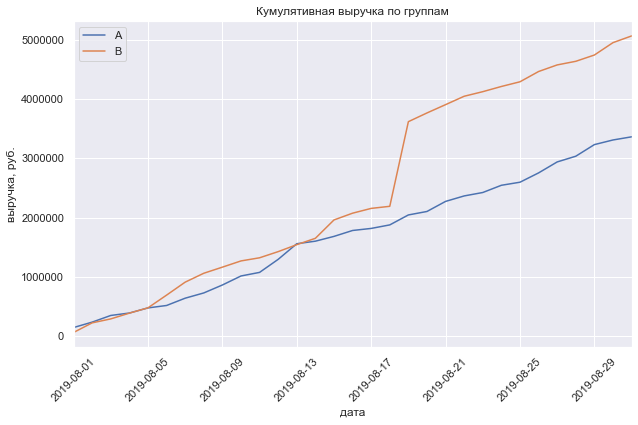

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(df['date'], df['revenue_a'], label='A')
plt.plot(df['date'], df['revenue_b'], label='B')

plt.legend() 
plt.title("Кумулятивная выручка по группам")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('дата')
plt.ylabel('выручка, руб.')
plt.xlim(dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31))
plt.xticks(rotation=45);

Выручка в группе A равномерно увеличивается в течение всего теста. В группе B наблюдается резкий всплеск кумулятивной выручки в середине теста, после чего рост опять стабилизируется и идет практически параллельно с группой A. Резкий всплеск показателей в группе В может сигнализировать либо об увеличении числа заказов, либо о появлении очень дорогих заказов в выборке. Это стоит проанализировать позже.


### **2.2.2. Построим график кумулятивного среднего чека по группам**

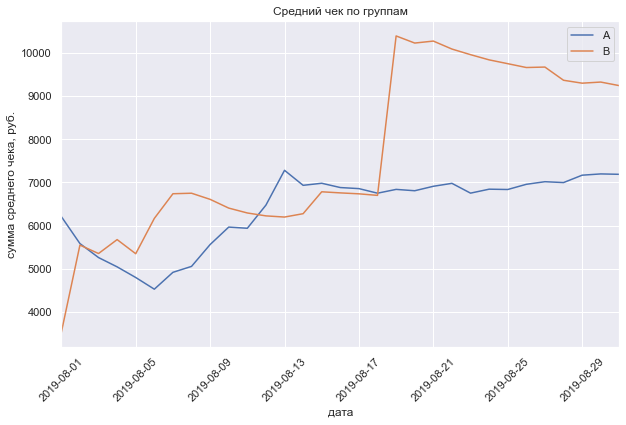

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(df['date'], df['revenue_a']/df['transactions_a'], label='A')
plt.plot(df['date'], df['revenue_b']/df['transactions_b'], label='B')
plt.legend() 
plt.title("Средний чек по группам")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('дата')
plt.ylabel('сумма среднего чека, руб.')
plt.xlim(dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31))
plt.xticks(rotation=45);

Средний чек в обеих группах растет, но крайне неравномерно. В группе А он подвержен сильным колебаниям в первой половине теста и становится равномерным во второй половине. В группе B также наблюдаются колебания в первой половине теста, а в середине теста наблюдается резкий рост, что судя по всему, связано с каким-то большим заказом. Данный скачок коррелирует с ростом кумулятивной выручки в группе В, который мы наблюдали на предыдущем графике. После этого всплеска показатели в группе В несколько снижаются, однако остаются стабильно выше, чем в группе А.

### **2.2.3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A**

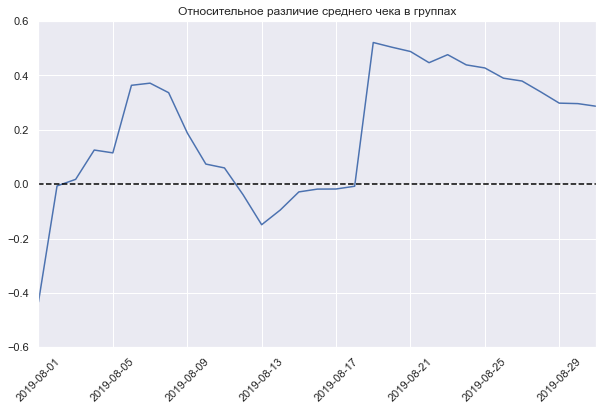

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(df['date'], (df['revenue_b']/df['transactions_b'])/(df['revenue_a']/df['transactions_a'])-1)

plt.axhline(y=0, color='black', linestyle='--') 
plt.title("Относительное различие среднего чека в группах")
plt.xlabel('дата')
plt.ylabel('относительное различие')
plt.xlim(dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31))
plt.ylim(-0.6, 0.6)
plt.xticks(rotation=45);

График различий «скачет» на протяжении всего теста. Мы опять-таки видим, как в середине теста группа В резко вырывается вперед (предположительно на фоне какого-либо единичного крупного заказа, что необходимо будет проверить позднее), но затем снова снижается. Тем не менее, к концу проведения испытаний группа В сохраняет более чем 20-процентный перевес над группой А. 

### **2.2.4. Построим график кумулятивной конверсии по группам**

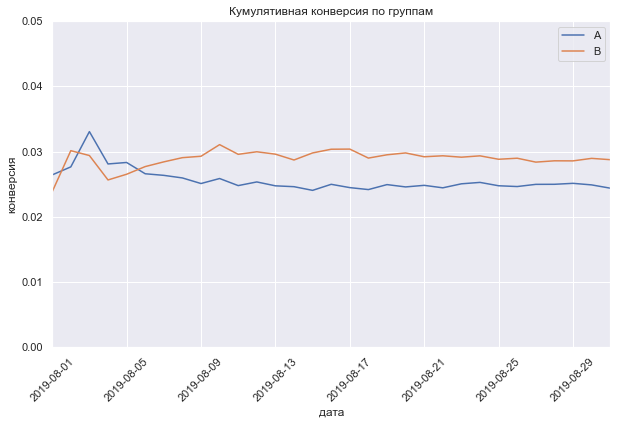

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(df['date'], df['buyers_a']/df['visitors_a'], label='A')
plt.plot(df['date'], df['buyers_b']/df['visitors_b'], label='B')
plt.legend()
plt.title("Кумулятивная конверсия по группам")
plt.xlabel('дата')
plt.ylabel('конверсия')
plt.xlim(dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31))
plt.ylim(0.0, 0.05) 
plt.xticks(rotation=45);

По показателям кумулятивной конверсии группа В также опережает группу А, причем это преимущество наблюдается практически на протяжении всего теста, не считая колебаний в самом начале. Сама по себе разница в показателях между группами небольшая, однако стабильность показателей может говорить о наличии ощутимого преимущества группа В.

### **2.2.5. Построим график относительного изменения кумулятивной конверсии группы B к группе A**

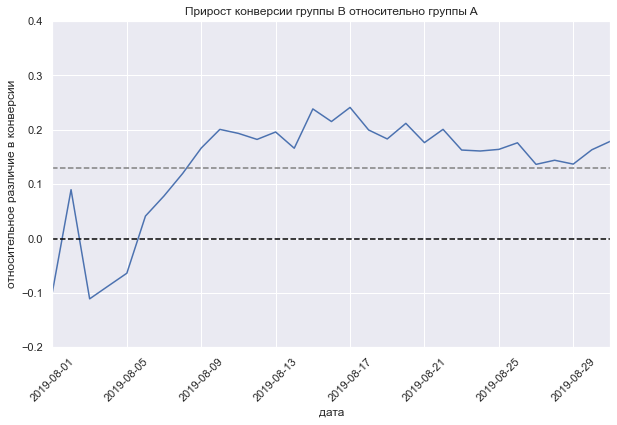

In [49]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(df['date'], (df['buyers_b']/df['visitors_b'])/(df['buyers_a']/df['visitors_a'])-1)
# plt.legend()
plt.title("Прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.13, color='grey', linestyle='--')
plt.xlabel('дата')
plt.ylabel('относительное различие в конверсии')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.2, 0.4])
plt.xticks(rotation=45);

По графику видно, что относительное превышение прироста кумулятивной конверсии в группе В над показателями группы А на протяжении большей части тестового периода составляет 13% и более и, несмотря на понижательный тренд во второй половине испытаний, к концу теста снова идет в рост, что указывает на лучшие показатели в группе В по сравнению с контрольной группой.

### **2.2.6. Построим точечный график стоимости заказов по пользователям**

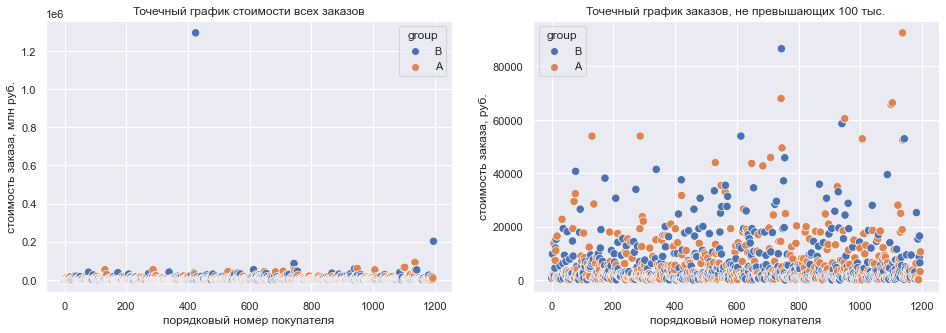

In [50]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
sns.scatterplot(x=orders.index, y=orders['revenue'], hue=orders['group'], ax=ax[0], s=70)
sns.scatterplot(x=orders.query('revenue < 100000').index, \
                y=orders.query('revenue < 100000')['revenue'], \
                hue=orders.query('revenue < 100000')['group'], ax=ax[1], s=70)
ax[0].set_ylabel('стоимость заказа, млн руб.')
ax[1].set_ylabel('стоимость заказа, руб.')
ax[0].set_xlabel('порядковый номер покупателя')
ax[1].set_xlabel('порядковый номер покупателя')
ax[0].set_title("Точечный график стоимости всех заказов")
ax[1].set_title("Точечный график заказов, не превышающих 100 тыс.");

По первому графику, где отображены все заказы, видно, что в группе В есть два аномальных выброса - заказы на 200 тыс. и 1,3 млн., которые могут оказывать существенное влияние на результаты теста, изменив их в пользу группы В. На втором графике, где более подробно представлено точечное распределение заказов, не превышающих 100 тыс.руб., видно, что основная часть заказов аккумулируется где-то в пределах до 20 тыс.руб. Выше этого уровня заказы немногочисленны, но они примерно одинаково распределены между обеими группами.

### **2.2.7. Определение границы аномальных пользователей по стоимости заказа**

Подсчитаем 95-й и 99-й перцентили стоимости заказов на пользователя.

In [51]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Только один процент пользователей оформлял заказы дороже 53,9 тыс. У 95% пользователей - сумма заказов не превышает 26,8 тыс. 

Проверим также распределение стоимости заказов на обычной гистограмме и гисторамме лог-распределения.

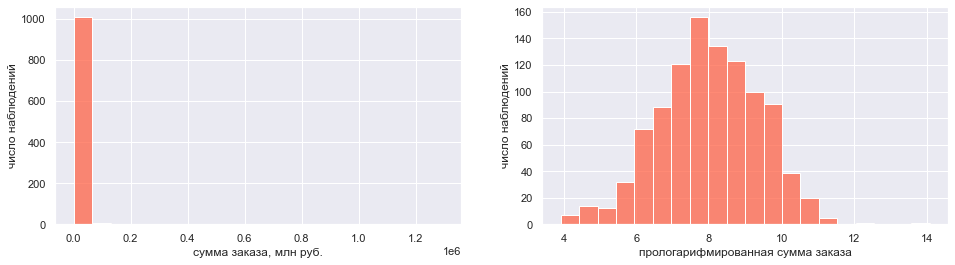

In [52]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.histplot(orders.revenue, kde=False, color="tomato", ax=ax[0], bins=20)
sns.histplot(np.log(orders.revenue), ax=ax[1], bins=20, color="tomato", kde=False)
ax[0].set_ylabel("число наблюдений")
ax[1].set_ylabel("число наблюдений")
ax[0].set_xlabel("сумма заказа, млн руб.")
ax[1].set_xlabel("прологарифмированная сумма заказа");

In [53]:
np.exp(11)

59874.14171519782

In [54]:
np.exp(7)

1096.6331584284585

Мы видим, что распределение стоимости заказов близко к логнормальному. Средняя сумма заказов находится в районе отметки в 1000 руб. Отсечку выбросов можно сделать по отметке в 60 тыс. рублей - по гистограмме логнормальнго распределения видно, что после этой отметки присутствуют уже совсем единичные показатели. 

Проверим, какой процент заказов мы удалим при такой отсечке.

In [55]:
(orders['revenue'] < 60000).mean()

0.9921259842519685

При отсечке заказов равных и дороже 60 тыс. рублей мы отсекаем 1% всех наблюдений. Этого должно быть достаточно для корректировки показателей в группах, поскольку, самое главное, мы избавляемся от двух аномально больших выбросов в группе В, которые могут искажать результаты.

### **2.2.8. Точечный график количества заказов по пользователям**

In [56]:
# Создадим переменную orders_cnt с группировкой заказов по пользователям и группам
orders_cnt = orders.groupby(['visitorId', 'group'])['transactionId'].agg('nunique').reset_index()

In [57]:
orders_cnt.head()

,visitorId,group,transactionId
0,5114589,B,1
1,6958315,B,1
2,11685486,A,1
3,39475350,B,1
4,47206413,B,1


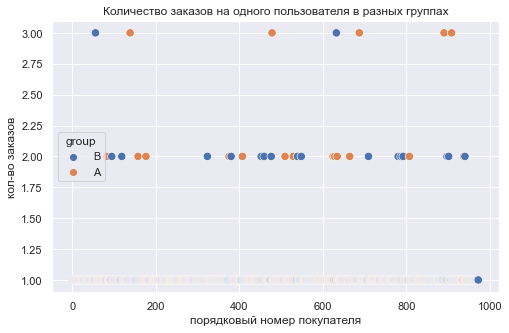

In [58]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=orders_cnt.index, y=orders_cnt['transactionId'], hue=orders_cnt['group'], s=70)
plt.xlabel('порядковый номер покупателя')
plt.ylabel('кол-во заказов')
plt.title("Количество заказов на одного пользователя в разных группах");

Самая плотная группа пользователей в обеих группах - это пользователи с одним заказом. Два заказа у одного пользователя встречается редко, а три заказа на пользователя - это практически единичные случаи как в группе А, так и в группе В. 

### **2.2.9. Определение границы аномальных пользователей по кол-ву заказов**

Подсчитаем 95-й и 99-й перцентили количества заказов. 

In [59]:
np.percentile(orders_cnt['transactionId'], [95, 99])

array([1., 2.])

95% пользователей оформляет всего один заказ. И лишь один процент пользователей делает два заказа и более. Это подтверждает наши выводы, сделанные по точечному графику кол-ва заказов, о том, что более двух заказов - это аномальные для нашего теста значения, которые можно исключить из подсчетов при корректировке данных. 

### **2.2.10. Статистическая значимость различий в конверсии между группами по «сырым» данным**

Проведем z-тест для двух пропорций, чтобы определить статистическую значимость различий в конверсии между группой А и группой В. За число "успешных" экспериментов возьмем суммарное количество пользователей, совершивших заказы, а за общее число наблюдений - суммарное число посетителей сайта в каждой группе за весь период проведения теста. 

Сформулируем нулевую и альтернативную гипотезы.
H0: различий в конверсии между группой А и группой В нет.
H1: различие в конверсии есть.

Обозначим уровень статистической значимости: alpha=0.05

In [60]:
from statsmodels.stats.proportion import proportions_ztest

In [61]:
_, p_value = (
    proportions_ztest([df.buyers_a.values[-1], \
                       df.buyers_b.values[-1]], \
                      [df.visitors_a.values[-1], \
                       df.visitors_b.values[-1]])
)
p_value

0.008442740682401598

In [62]:
# Подсчитает относительную разницу в конверсии между группами
(df.buyers_b.values[-1]/df.visitors_b.values[-1])/(df.buyers_a.values[-1]/df.visitors_a.values[-1]) - 1

0.17904470437770947

Крайне маленькое значение p-value - 0.008 (существенно ниже уровня значимости в 0.05) позволяет нам отвергнуть нулевую гипотезу о равенстве показателей конверсии между двумя группами. P-value говорит нам о том, что разница в группах есть и не могла быть получена случайно. Эти выводы подтверждаются показателем относительного "выигрыша" группы В по конверсии - 17,9% - довольно заметная разница в пользу тестовой группы.

### 2.2.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Подсчитаем размер среднего чека в обеих группах

In [63]:
print('Средний чек в группе А: ', round(orders.query('group =="A"')['revenue'].mean(), 1))
print('Средний чек в группе B: ', round(orders.query('group =="B"')['revenue'].mean(), 1))

Средний чек в группе А:  7189.4
Средний чек в группе B:  9249.9


На первый взгляд, разница в значении среднего чека есть и группа В с перевесом обгоняет по этому показателю контрольную группу. Однако нужно проверить, не могли ли мы получить такую разницу случайно. 
Учитывая, что мы имеем дело с логнормальным распределением при анализе данных о стоимости заказов в каждой группе, для проверки статистической значимости различий в среднем чеке нам нужно использовать непараметрический тест Манна-Уитни. 

Сформулируем нулевую и альтернативную гипотезы.

H0: различий в среднем чеке между группой А и группой В нет.
H1: различие в среднем чеке есть.

alpha=0.05

In [64]:
st.mannwhitneyu(orders.query('group =="A"')['revenue'], orders.query('group =="B"')['revenue'])[1]

0.8294908998149533

Значение p-value в 0,83 не позволяет нам отвергнуть нулевую гипотезу, несмотря на видимое превышение среднего чека в группе В. Делаем вывод, что статистически значимых различий в среднем чеке между группами нет. Возможно, отсутствие статистической значимости, на которое нам указывает p-value, объясняется наличием аномально крупных заказов в группе В, которые сдвинули средний показатель чека в большую сторону. Это нам предстоит проверить на "очищенных" данных.

### 2.2.12. Статистическая значимость различий в конверсии по "очищенным" данным

In [65]:
# Сохраним в переменную идентификаторы пользователей, совершивших более 2 заказов
id_orders_abnormal = orders_cnt.query('transactionId > 2').visitorId.values

In [66]:
id_orders_abnormal

array([ 249864742,  611059232, 2108163459, 2742574263, 2988190573,
       3908431265, 3967698036], dtype=int64)

In [67]:
# Создадим датафрейм с "очищенными" данными, исключив заказы свыше 60 тыс. и пользователей, сделавших более двух заказов
orders_filtered = orders[(orders['revenue'] < 60000)&(~orders['visitorId'].isin(id_orders_abnormal))]

In [68]:
# Сгруппируем датафрейм по дате и разнесем данные по группам А и В в разные столбцы 
orders_grouped_filtered = (
  orders_filtered.pivot_table(index='date', columns='group', \
                     values=['transactionId', 'visitorId', 'revenue'], \
                     aggfunc={'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'})
  .reset_index()
)
orders_grouped_filtered.columns = ['date', 'revenue_a', 'revenue_b', 'transactions_a', 'transactions_b', 'buyers_a', 'buyers_b']

In [69]:
orders_grouped_filtered.head()

,date,revenue_a,revenue_b,transactions_a,transactions_b,buyers_a,buyers_b
0,2019-08-01,112340,59758,18,17,17,17
1,2019-08-02,89912,162043,18,23,17,22
2,2019-08-03,112473,67049,24,14,24,14
3,2019-08-04,41176,96890,11,14,11,13
4,2019-08-05,86383,89908,22,21,22,21


In [70]:
# Подсчитаем p-value, используя z-тест для пропорций
_, p_value = (
    proportions_ztest([orders_grouped_filtered.buyers_a.sum(), \
                       orders_grouped_filtered.buyers_b.sum()], \
                      [visitors_grouped.visitors_a.sum(), \
                       visitors_grouped.visitors_b.sum()])
)
p_value

0.004664255660206521

In [71]:
# Подсчитаем относительную разницу в конверсии между группами
(orders_grouped_filtered.buyers_b.sum()/visitors_grouped.visitors_b.sum())/(orders_grouped_filtered.buyers_a.sum()/visitors_grouped.visitors_a.sum()) - 1

0.19618300606172845

На очищенных данных мы получили те же самые результаты, что и на неочищенных: статистические различия в конверсии в группах А и В присутствуют (p-value = 0.005, что в десять раз ниже уровня значимости в 0.05). Причем относительный "выигрыш" группы В по конверсии на очищенных данных оказался выше, чем на сырых данных: 19,6% против 17,9%. 

Это позволяет нам сделать уверенный вывод о наличии различий в конверсии между группами в пользу группы В: здесь показатели конверсии по всем параметрам действительно лучше, чем в группе А. И в этом плане можно говорить об успешности тестирования гипотезы, результатом которого стал рост конверсии в тестовой группе.

### 2.2.13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [72]:
print('Средний чек в группе А: ', round(orders_filtered.query('group =="A"')['revenue'].mean(), 1))
print('Средний чек в группе B: ', round(orders_filtered.query('group =="B"')['revenue'].mean(), 1))

Средний чек в группе А:  6487.0
Средний чек в группе B:  6374.2


Если на сырых данных мы получили разницу в среднем чеке  между группами в более чем 2000 руб., то на очищенных данных разница резко сократилась: всего 110 руб., т.е. на первый взгляд можно говорить об отсутствии серьезной разницы в этом показателе между группами. 
Проверим наши выкладки с использованием непараметрического теста Манна-Уитни. 

Нулевая и альтернативная гипотезы остаются теми же:
H0: различий в среднем чеке между группой А и группой В нет.
H1: различие в среднем чеке есть.

alpha=0.05

In [73]:
st.mannwhitneyu(orders_filtered.query('group =="A"')['revenue'], orders_filtered.query('group =="B"')['revenue'])[1]

0.8269080692459636

Как и в случае с "сырыми" данными, мы получили веские основания не отвергать нулевую гипотезу (значение p-value в 0,83 существенно выше alpha). Это значит, что разницы в среднем чеке между группами мы не получили. 

Посмотрим еще, как выглядит график динамики кумулятивного среднего чека по группами после того, как мы удалили аномально крупные заказы из группы В: сохраниться ли преимущество группы В по этому показателю, которое мы наблюдали на сырых данных, начиная с середины месяца. 

In [74]:
# Создадим датафрейм с кумулятивными значениями по "очищенным" данным
df_filtered = (
    dates.apply(lambda x: orders_grouped_filtered[orders_grouped_filtered['date'] <= x['date']]
             .agg({'date' : 'max', 'revenue_a' : 'sum', 'revenue_b' : 'sum' , \
                   'transactions_a' : 'sum', 'transactions_b' : 'sum', \
                   'buyers_a' : 'sum', 'buyers_b' : 'sum'}), axis=1)
)

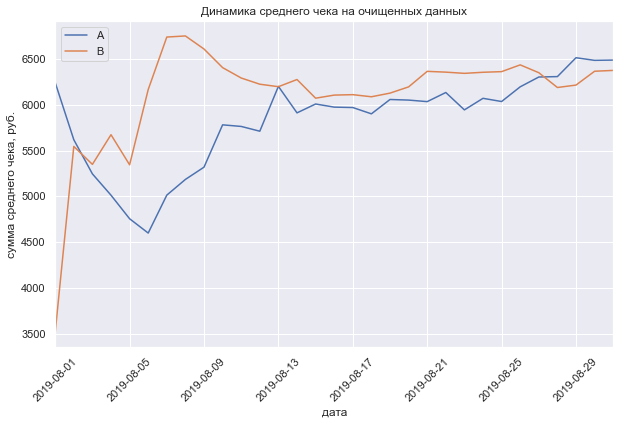

In [75]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(df_filtered['date'], df_filtered['revenue_a']/df_filtered['transactions_a'], label='A')
plt.plot(df_filtered['date'], df_filtered['revenue_b']/df_filtered['transactions_b'], label='B')
plt.legend() 
plt.title("Динамика среднего чека на очищенных данных")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('дата')
plt.ylabel('сумма среднего чека, руб.')
plt.xlim(dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31))
plt.xticks(rotation=45);

Как мы и предполагали, резкий рост среднего чека и дальнейшее превышение кумулятивных показателей в группе В объяснялось аномально большими заказами двух пользователей, которые исказили среднестатистическую картину. После очистки данных средний чек в группе В практически сравнялся с группой А, а к концу теста мы даже видим, что группа А немного обогнала группу В по этому показателю. 

## **2.3. Выводы и рекомендации**

Мы получили статистически значимое различие в уровне конверсии между тестовой и контрольной группами как на "сырых" данных, так и на "очищенных" данных. При уровне статистической значимости в 0.005 относительный "выигрыш" в конверсии группы В составил 19,6%. График различия в конверсии также показал, что результаты группы В, по большей части, были стабильно лучше группы А. Это дает нам основание делать вывод об успешности теста: тестируемая гипотеза работает и дает заметный прирост в конверсии.

При этом статистически значимого различия в среднем чеке в группах А и В зафиксировано не было ни на "сырых" данных, ни на "очищенных". График среднего чека на очищенных данных также подверждает, что значения в обеих группах сопоставимы и практически сравнялись к концу месяца тестирования. Однако сам по себе данный факт не говорит о неуспешности эксперимента. Важно, что мы не наблюдаем снижения размера среднего чека в группе В по сравнению с группой А, поскольку прирост конверсии в группе В на фоне сохранения размера среднего чека все равно обеспечивает компании прирост выручки. 

На основании вышеизложенных выводов рекомендуется принять решение остановить тест, признать его успешным и зафиксировать прирост показателя конверсии в группе В. 